<a href="https://colab.research.google.com/github/swostika17/Course_Work-6005-AI-/blob/main/Part2_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

print("Dataset shape:", X.shape)
X.head()


Dataset shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


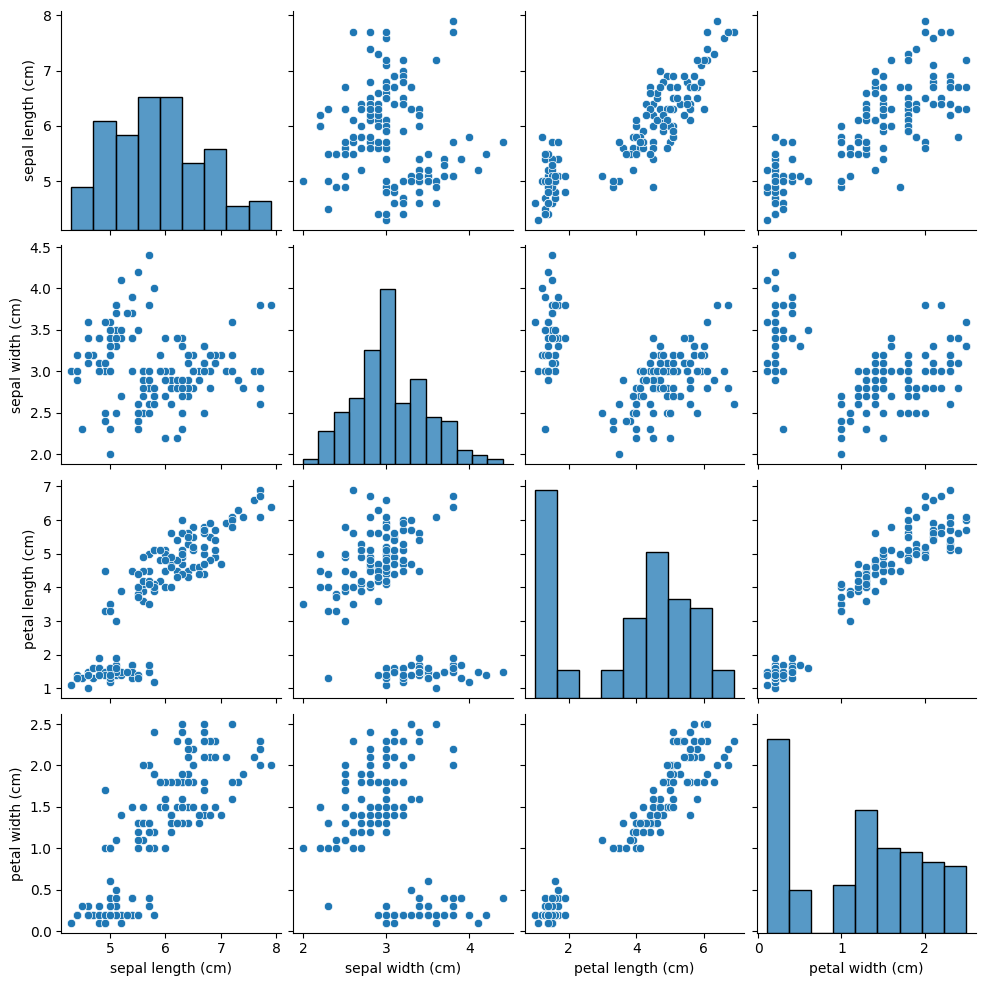

In [ ]:
sns.pairplot(X)
plt.show()


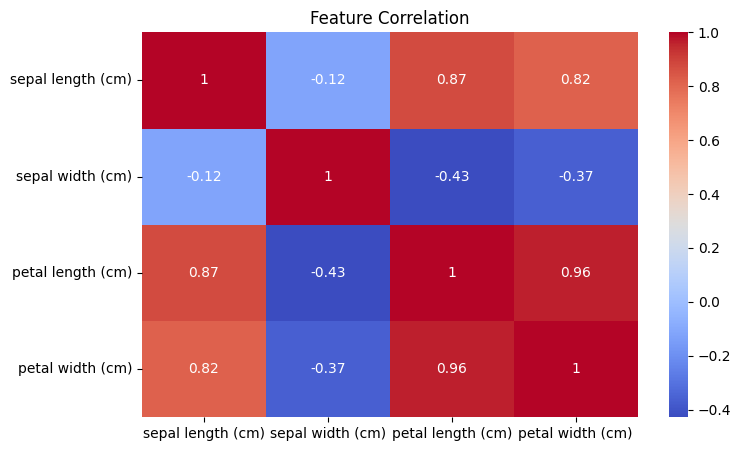

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


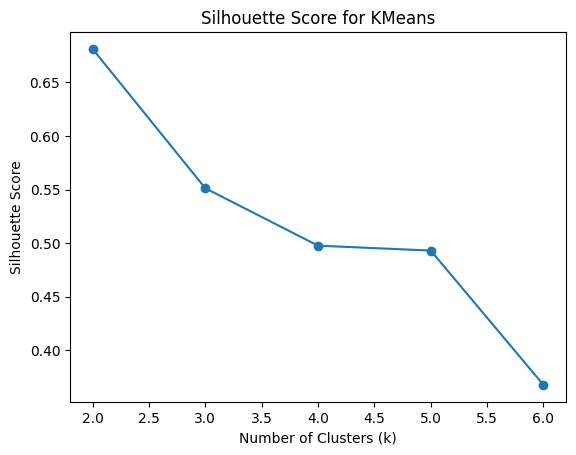

Best k = 2


In [ ]:
scores = []
K_range = range(2, 7)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    score = silhouette_score(X, km.labels_)
    scores.append(score)

plt.plot(K_range, scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for KMeans")
plt.show()

best_k = K_range[np.argmax(scores)]
print("Best k =", best_k)


In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X)

X["Cluster"] = clusters


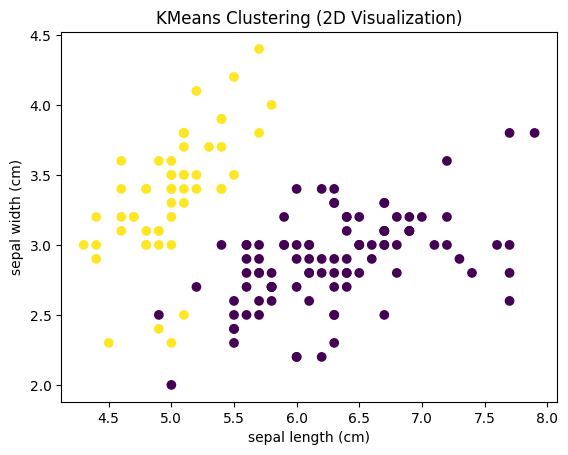

In [ ]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=clusters, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("KMeans Clustering (2D Visualization)")
plt.show()
